# Klasifikácia hlavných záznamov verejných obstarávaní do 1. úrovne CPV pomocou modelu MKaan/multilingual-cpv-sector-classifier

In [1]:
# Vytvorenie pipeline pre klasifikaciu textov a nacitanie CSV suboru zaznamov
import pandas as pd
from transformers import pipeline

pipe = pipeline("text-classification", model="MKaan/multilingual-cpv-sector-classifier")

data = pd.read_csv("contracts_mkaan.csv")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/7.87k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/712M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

In [ ]:
# Mapovanie nazvov labelov modelu na pouzivane labely v datovej vzorke
label_mapping = {
        "Agricultural, farming, fishing, forestry and related products. 🌾": "03 — Poľnohospodárske, farmárske, rybárske, lesnícke a súvisiace produkty",
        "Petroleum products, fuel, electricity and other sources of energy. 🔋": "09 — Ropné výrobky, palivo, elektrina a ostatné zdroje energie",
        "Mining, basic metals and related products. ⚙️": "14 — Produkty ťažobného priemyslu, základné kovy a príbuzné produkty",
        "Food, beverages, tobacco and related products. 🍽️": "15 — Potraviny, nápoje, tabak a príbuzné produkty",
        "Agricultural machinery. 🚜": "16 — Poľnohospodárske stroje",
        "Clothing, footwear, luggage articles and accessories. 👖": "18 — Odevy, obuv, brašnárske výrobky a príslušenstvo",
        "Leather and textile fabrics, plastic and rubber materials. 🧵": "19 — Koža a textílie, plastové a gumené materiály",
        "Printed matter and related products. 📰": "22 — Tlačené výrobky a príbuzné produkty",
        "Chemical products. 🧪": "24 — Chemické výrobky",
        "Office and computing machinery, equipment and supplies except furniture and software packages. 🖨️": "30 — Kancelárske a počítacie stroje, vybavenie a spotrebný materiál s výnimkou nábytku a softvérových balíkov",
        "Electrical machinery, apparatus, equipment and consumables; Lighting. ⚡": "31 — Elektrické stroje, prístroje, zariadenia a spotrebný tovar; osvetlenie",
        "Radio, television, communication, telecommunication and related equipment. 📡": "32 — Rozhlas, televízia, komunikácie, telekomunikácie a príbuzné zariadenia",
        "Medical equipments, pharmaceuticals and personal care products. 💉": "33 — Zdravotnícke vybavenie, farmaceutický materiál a výrobky osobnej starostlivosti",
        "Transport equipment and auxiliary products to transportation. 🚌": "34 — Prepravné zariadenia a pomocné výrobky na prepravu",
        "Security, fire-fighting, police and defence equipment. 🧯": "35 — Bezpečnostné, hasičské, policajné a ochranné vybavenie",
        "Musical instruments, sport goods, games, toys, handicraft, art materials and accessories. 🎸": "37 — Hudobné nástroje, športový tovar, hry, hračky, materiály pre remeselné a umelecké práce a príslušenstvo",
        "Laboratory, optical and precision equipments (excl. glasses). 🔬": "38 — Laboratórne, optické a presné prístroje a vybavenie (s výnimkou skiel)",
        "Furniture (incl. office furniture), furnishings, domestic appliances (excl. lighting) and cleaning products. 🗄️": "39 — Nábytok (vrátane kancelárskeho nábytku), zariadenie interiéru, domáce spotrebiče (s výnimkou osvetlenia) a čistiace prostriedky",
        "Collected and purified water. 🌊": "41 — Zachytená a vyčistená voda",
        "Industrial machinery. 🏭": "42 — Priemyselné mechanizmy",
        "Machinery for mining, quarrying, construction equipment. ⛏️": "43 — Strojové zariadenie na hlbinnú a povrchovú ťažbu, stavebné zariadenia",
        "Construction structures and materials; auxiliary products to construction (excepts electric apparatus). 🧱": "44 — Stavebné konštrukcie a materiály; pomocné výrobky pre konštrukcie (s výnimkou elektrických prístrojov)",
        "Construction work. 🏗️": "45 — Stavebné práce",
        "Software package and information systems. 🔣": "48 — Softvérové balíky a informačné systémy",
        "Repair and maintenance services. 🔧": "50 — Opravárske a údržbárske služby",
        "Installation services (except software). 🛠️": "51 — Inštalačné služby (s výnimkou softvéru)",
        "Hotel, restaurant and retail trade services. 🏨": "55 — Hotelové, reštauračné a maloobchodné služby",
        "Transport services (excl. Waste transport). 💺": "60 — Dopravné služby (bez prepravy odpadu)",
        "Supporting and auxiliary transport services; travel agencies services. 🚃": "63 — Podporné a pomocné dopravné služby, služby cestovných kancelárií",
        "Postal and telecommunications services. 📶": "64 — Poštové a telekomunikačné služby",
        "Public utilities. ⛲": "65 — Verejné služby",
        "Financial and insurance services. 👨‍💼": "66 — Finančné a poisťovacie služby",
        "Real estate services. 🏠": "70 — Realitné služby (služby s nehnuteľnosťami)",
        "Architectural, construction, engineering and inspection services. 👷‍♂️": "71 — Architektonické, stavebné, inžinierske a inšpekčné služby",
        "IT services: consulting, software development, Internet and support. 🖥️": "72 — Služby informačných technológií: konzultácie, vývoj softvéru, internet a podpora",
        "Research and development services and related consultancy services. 👩‍🔬": "73 — Výskum a vývoj a súvisiace poradenské služby",
        "Administration, defence and social security services. 👮‍♀️": "75 — Verejná správa, obrana, sociálne zabezpečenie a s tým spojené služby",
        "Services related to the oil and gas industry. ⛽": "76 — Služby súvisiace s ropným a plynárenskym priemyslom",
        "Agricultural, forestry, horticultural, aquacultural and apicultural services. 👨🏿‍🌾": "77 — Poľnohospodárske, lesnícke, záhradnícke služby a služby v oblasti akvakultúry a včelárstva",
        "Business services: law, marketing, consulting, recruitment, printing and security. 👩‍💼": "79 — Podnikateľské služby: právo, marketing, konzultácie, nábor pracovníkov, tlačiarenské a bezpečnostné služby",
        "Education and training services. 👩🏿‍🏫": "80 — Vzdelávacie a školiace (výcvikové) služby",
        "Health and social work services. 👨🏽‍⚕️": "85 — Zdravotnícka a sociálna pomoc",
        "Sewage-, refuse-, cleaning-, and environmental services. 🧹": "90 — Kanalizačné služby, služby na odstraňovanie odpadu, čistenie a environmentálne služby",
        "Recreational, cultural and sporting services. 🚴": "92 — Rekreačné, kultúrne a športové služby",
        "Other community, social and personal services. 🧑🏽‍🤝‍🧑🏽": "98 — Iné služby pre verejnosť, sociálne služby a služby jednotlivcom"
    }

# Funkcia na ziskanie labelov ziskanych klasifikaciou dat existujucim modelom MKaan
def get_results(row):
    text = row["contract_text"]
    results = pipe(text)
    original_label = results[0]["label"]
    modified_label = label_mapping.get(original_label, original_label)
    return modified_label, results[0]["score"]

# Pridanie stlpcov vysledneho labelu "predicted_label" s jeho pravdepodobnostou "predicted_score" do DataFrame
data[["predicted_label", "predicted_score"]] = data.apply(get_results, axis=1).apply(pd.Series)

In [ ]:
# Vytvorenie klasifikacneho reportu pre vyhodnotenie uspesnosti klasifikacie
from sklearn.metrics import accuracy_score, classification_report

df_classification_report = classification_report(data["cpv_desc"], data["predicted_label"], zero_division=0, output_dict=True)
print("Klasifikačná správa:\n", df_classification_report)

Klasifikačná správa:
 {'03 — Poľnohospodárske, farmárske, rybárske, lesnícke a súvisiace produkty': {'precision': 0.0008992805755395684, 'recall': 0.012048192771084338, 'f1-score': 0.0016736401673640169, 'support': 83}, '09 — Ropné výrobky, palivo, elektrina a ostatné zdroje energie': {'precision': 0.8953703703703704, 'recall': 0.9192015209125475, 'f1-score': 0.9071294559099438, 'support': 1052}, '14 — Produkty ťažobného priemyslu, základné kovy a príbuzné produkty': {'precision': 0.27380952380952384, 'recall': 0.45098039215686275, 'f1-score': 0.34074074074074073, 'support': 102}, '15 — Potraviny, nápoje, tabak a príbuzné produkty': {'precision': 0.08108108108108109, 'recall': 0.34545454545454546, 'f1-score': 0.1313364055299539, 'support': 165}, '16 — Poľnohospodárske stroje': {'precision': 0.006756756756756757, 'recall': 0.004132231404958678, 'f1-score': 0.005128205128205128, 'support': 242}, '18 — Odevy, obuv, brašnárske výrobky a príslušenstvo': {'precision': 0.47737556561085975, 'r

In [ ]:
# Spracovanie klasifikacneho reportu do DataFrame podla jednotlivych oddielov schemy CPV
report = classification_report(data["cpv_desc"], data["predicted_label"], zero_division=0, output_dict=True)

df_classification_report = pd.DataFrame(report).transpose()
df_classification_report = df_classification_report.drop(df_classification_report.iloc[len(df_classification_report):].index)
df_classification_report.reset_index(drop=True, inplace=True)
df_classification_report["support"] = df_classification_report["support"].astype(int)

df_metrics = df_classification_report.copy()
df_metrics["index"] = df_metrics.index

df_metrics = df_metrics.groupby("index").agg({"precision": "mean", "recall": "mean", "f1-score": "mean", "support": "sum"})
df_metrics = df_metrics.iloc[:-3]
df_metrics.reset_index(drop=True, inplace=True)

display(df_metrics.style.background_gradient(subset=["precision", "recall", "f1-score"], vmin=0, vmax=1))

,precision,recall,f1-score,support
0,0.000899,0.012048,0.001674,83
1,0.895370,0.919202,0.907129,1052
2,0.273810,0.450980,0.340741,102
3,0.081081,0.345455,0.131336,165
4,0.006757,0.004132,0.005128,242
5,0.477376,0.539642,0.506603,391
6,0.131868,0.150000,0.140351,80
7,0.477612,0.378698,0.422442,169
8,0.626198,0.542936,0.581602,361
9,0.726198,0.565133,0.635621,2065


In [ ]:
cpv_level1_ids = ["03", "09", "14", "15", "16", "18", "19", "22", "24", "30", "31", "32", "33", "34", "35", "37", "38", "39", "41", "42", "43", "44", "45", "48", "50", "51", "55", "60", "63", "64", "65", "66", "70", "71", "72", "73", "75", "76", "77", "79", "80", "85", "90", "92", "98"]

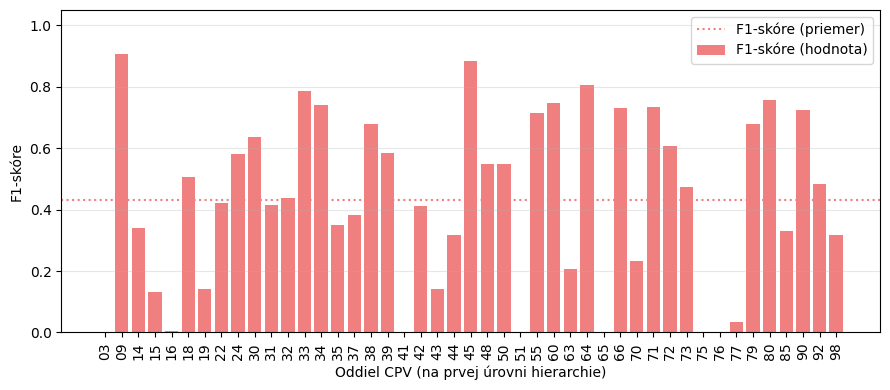

In [ ]:
# Vizualizacia stlpcoveho grafu dosiahnutych hodnot F1-skore pre jednotlive oddiely CPV (na prvej urovni)
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 4))

plt.bar(range(len(df_metrics)), df_metrics["f1-score"], color="lightcoral")

plt.xlabel("Oddiel CPV (na prvej úrovni hierarchie)")
plt.xticks(np.arange(len(df_metrics)), cpv_level1_ids, rotation=90)
plt.ylabel("F1-skóre")
if (max(df_metrics["f1-score"]) == 1):
  plt.ylim(0, 1)
else:
  plt.ylim(0, 1.05)

plt.axhline(y=df_metrics["f1-score"].mean(), color='lightcoral', linestyle='dotted')

plt.legend(["F1-skóre (priemer)", "F1-skóre (hodnota)"])
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()

plt.show()

In [ ]:
# Vypocet mikro- a makro-metrik spravnosti, presnosti, navratnosti a F1-skore
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

accuracy = accuracy_score(data['cpv_desc'], data['predicted_label'])
macro_precision = precision_score(data['cpv_desc'], data['predicted_label'], average="macro", zero_division=0)
macro_recall = recall_score(data['cpv_desc'], data['predicted_label'], average="macro")
macro_f1 = f1_score(data['cpv_desc'], data['predicted_label'], average="macro")

print(f"Accuracy: {round(accuracy, 3)}")
print(f"Precision: {round(macro_precision, 3)}")
print(f"Recall: {round(macro_recall, 3)}")
print(f"F1-score: {round(macro_f1, 3)}")

Accuracy: 0.681
Precision: 0.439
Recall: 0.442
F1-score: 0.433


In [ ]:
accuracy = accuracy_score(data['cpv_desc'], data['predicted_label'])
micro_precision = precision_score(data['cpv_desc'], data['predicted_label'], average="micro", zero_division=0)
micro_recall = recall_score(data['cpv_desc'], data['predicted_label'], average="micro")
micro_f1 = f1_score(data['cpv_desc'], data['predicted_label'], average="micro")

print(f"Accuracy: {round(accuracy, 3)}")
print(f"Precision: {round(micro_precision, 3)}")
print(f"Recall: {round(micro_recall, 3)}")
print(f"F1-score: {round(micro_f1, 3)}")

Accuracy: 0.681
Precision: 0.681
Recall: 0.681
F1-score: 0.681


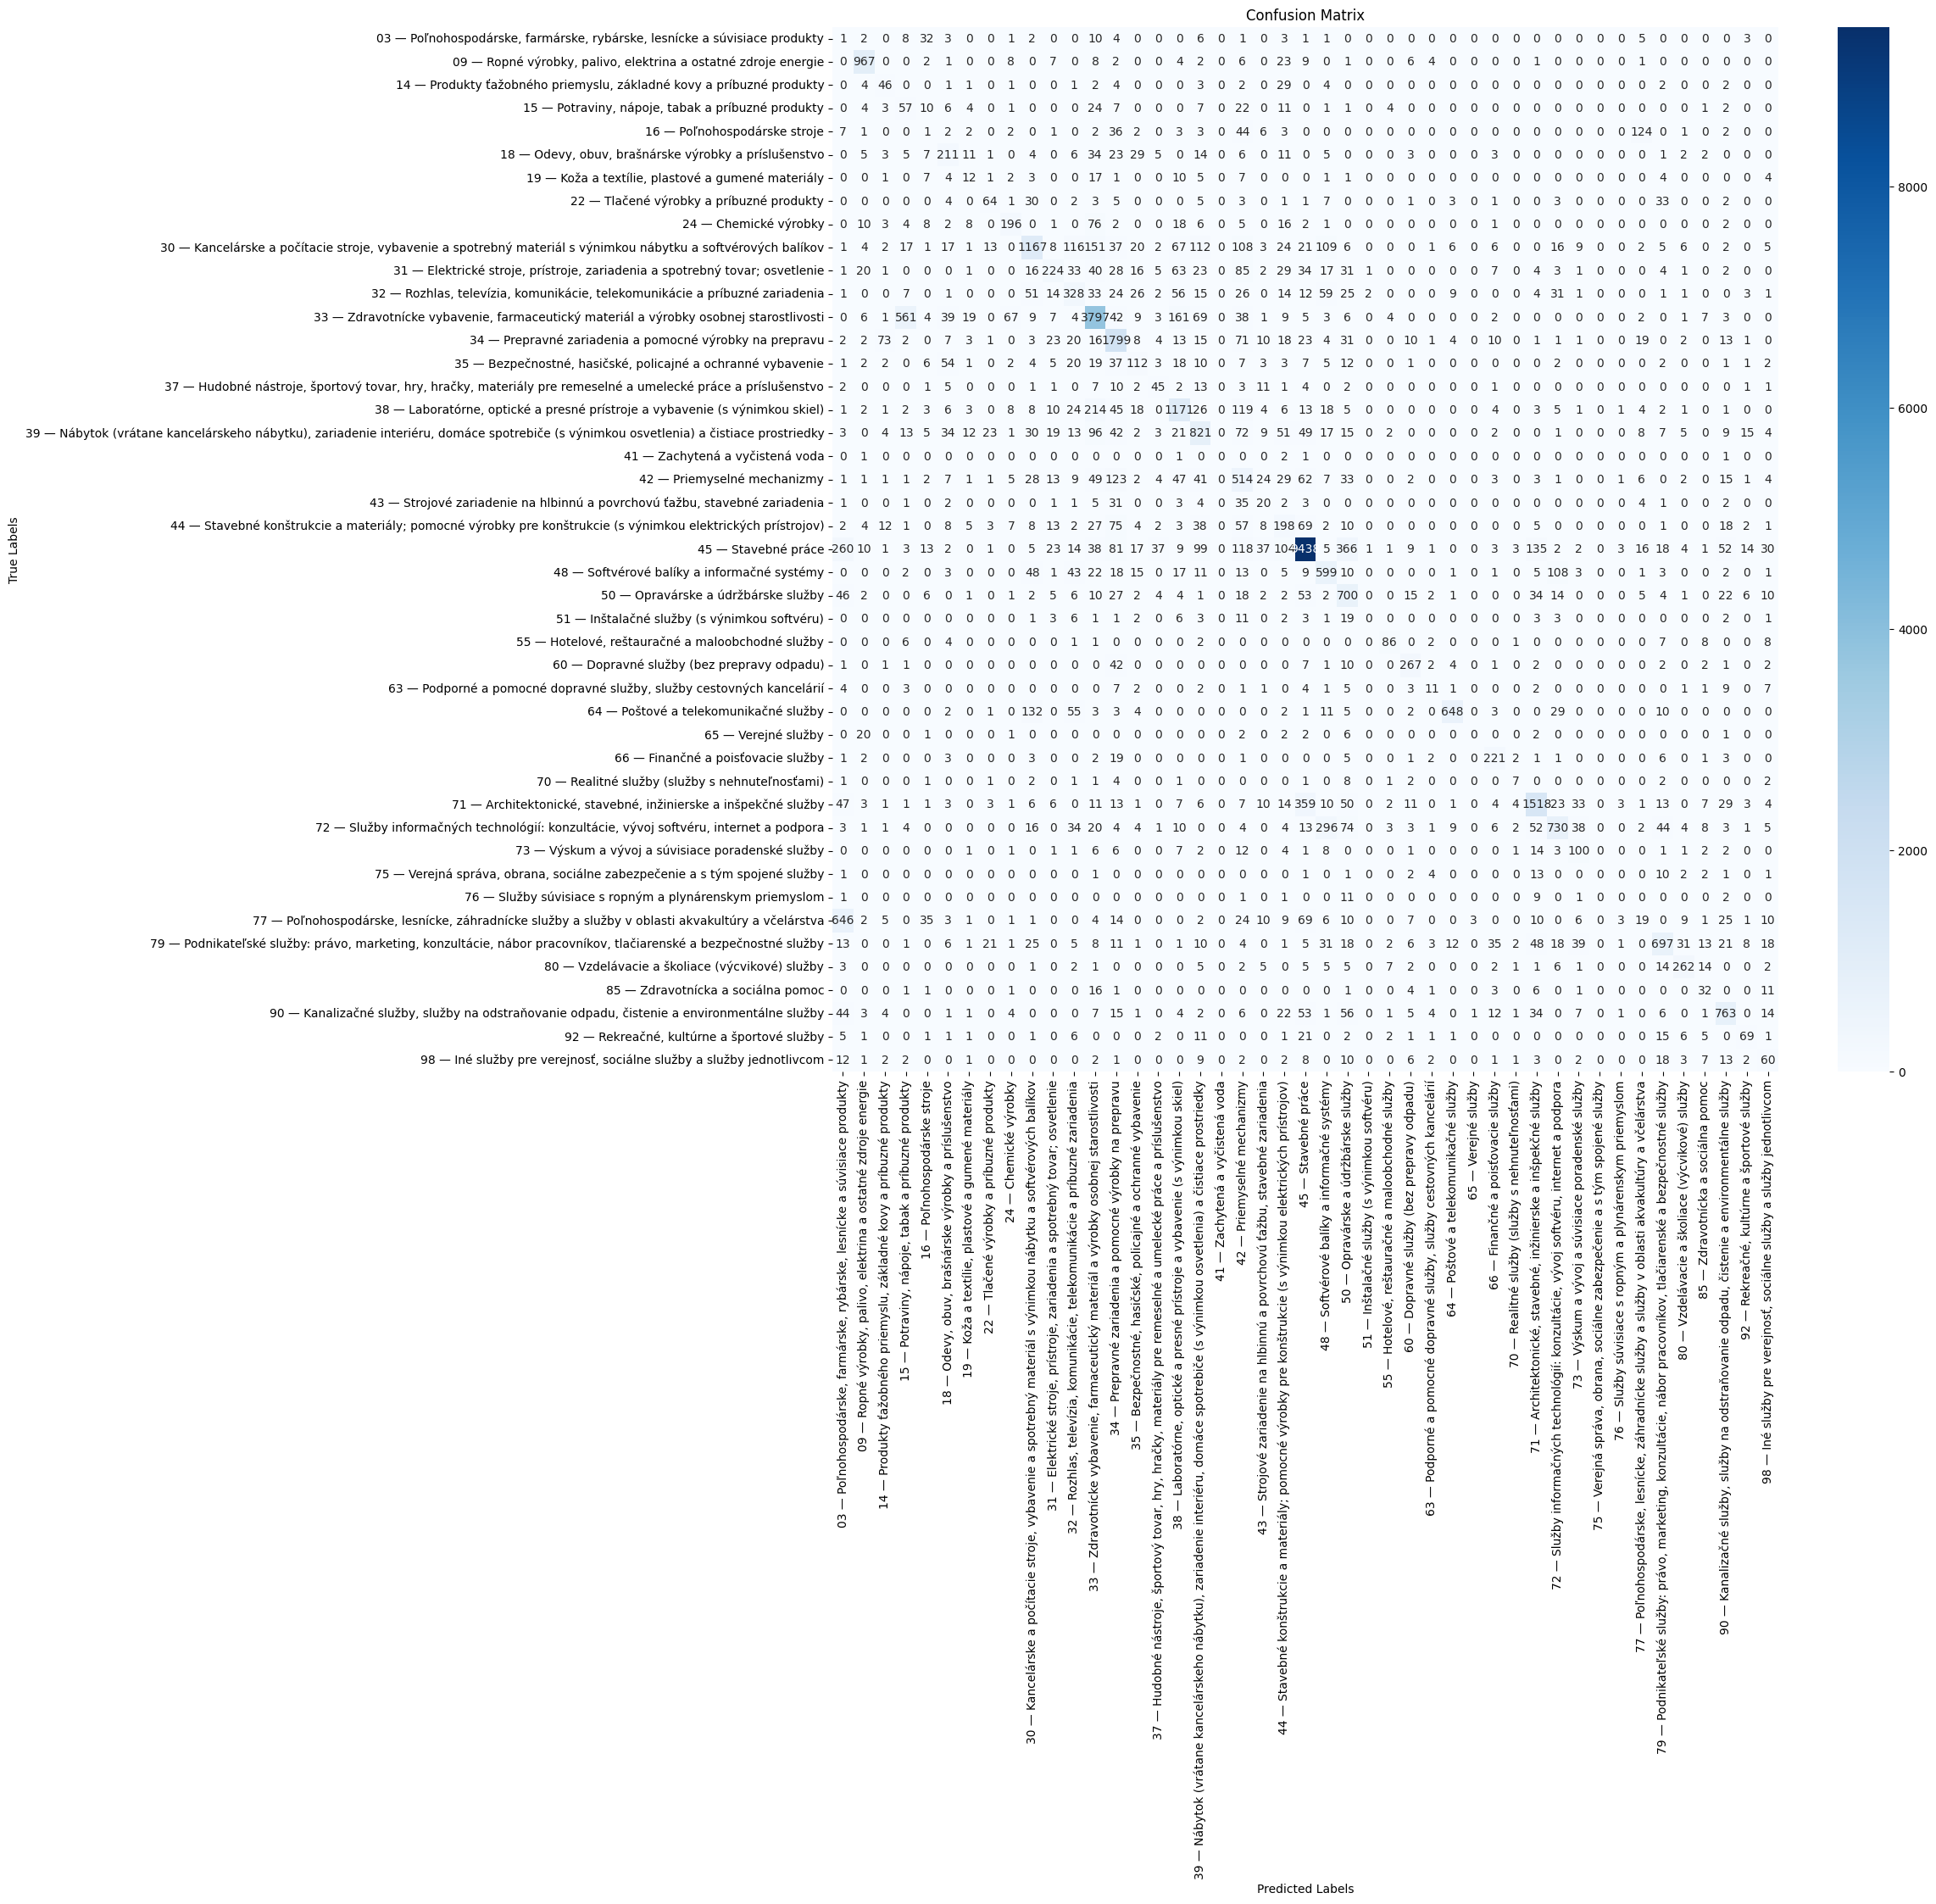

In [ ]:
# Vizualizacia matice zamen pomocou heatmap pre 45 oddielov prvej urovne hierarchie CPV
import seaborn as sns
from sklearn.metrics import confusion_matrix

all_labels = sorted(set(data["cpv_desc"].unique()) | set(data["predicted_label"].unique()))

conf_matrix = confusion_matrix(data["cpv_desc"], data["predicted_label"])

plt.figure(figsize=(18, 16))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=all_labels, yticklabels=all_labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.show()